# Определение закономерностей, влияющих на коммерческий успех компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Нам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

## Изучение данных из файла.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv("C:/Users/dimil/OneDrive/Desktop/games.csv")
except:
    df = pd.read_csv('/datasets/games.csv')

df.head(10)

In [3]:
df.describe().T

In [4]:
df.info()

Первое знакомство с данными показывает отсутствие значительного количества данных в 3 столбцах, что необходимо изучить подробнее.

## Подготовка данных

Изменим названия столбцов в соответствии с правилами написания заголовков языка Python:

In [5]:
df.columns = df.columns.str.lower()
df.head()                   

Изучим пропуски в данных:

In [6]:
df['year_of_release'].value_counts()

In [7]:
df = df.dropna(subset=['year_of_release'])

Теперь обработаем пропуски в столбце с оценками критиков. Процент пропусков довольно высок, при этом нет каких либо аномальных значений. Оставим пропуски как есть.

In [8]:
display(df['critic_score'].value_counts())

Аналогично можно поступить с данными по столбцу с оценками пользователей. Во многих ячейках мы видим значение tbd (to be done) - это значит, что оценка еще не была выставлена. Заполним отсутствующие значения аналогично столбцу с оценками критиков.

In [78]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [10]:
display(df['user_score'].value_counts())

Изучим пропуски в столбце рейтинг:

In [11]:
display(df['rating'].value_counts())

Процент пропусков здесь также значительный. Можно оставить их без изменений или создать отдельную категорию: 

In [12]:
df['rating'] = df['rating'].fillna('not rated')

Заменим тип данных в строке, содержащей информацию о годе выпуска игры, на int:

In [13]:
df['year_of_release'] = df['year_of_release'].astype('int64')


In [14]:
df.info()

Теперь заменим тип данных об оценках пользователей на float:

In [15]:
df['user_score'] = df['user_score'].astype('float64')




Посчитаем суммарные продажи во всех регионах:

In [16]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
display(df.head(10))

 На всякий случай, проверим выборку на наличие дубликатов:

In [17]:
display(df.duplicated().sum()) 

In [18]:
df.info()

Предобратотка позволила избавиться от пустых ячеек в нашем датасете и теперь мы можем приступить к анализу.

## Исследовательский анализ данных.

Изучим, сколько игр выпускалось в разные годы:

In [19]:
df['year_of_release'].value_counts()

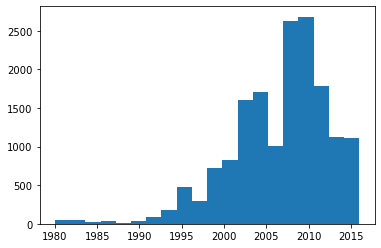

In [20]:
plt.hist(df['year_of_release'], bins=20)
plt.show();

Количество выпущенных игр по годам различается значительно. Подавляющая часть игр вышла после 2000 года. 

Теперь изучим распределение по платформам:

In [21]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


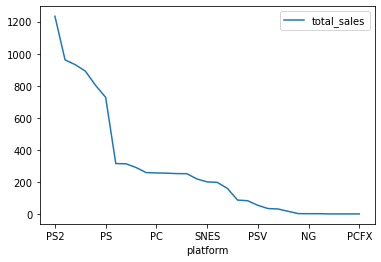

In [87]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(legend=True)

Построим гистограммы распределения 6 топовых платформ по годам: 

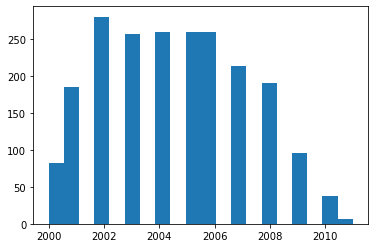

In [23]:
plt.hist(df['year_of_release'][df['platform'] == 'PS2'], bins=20)
plt.show();

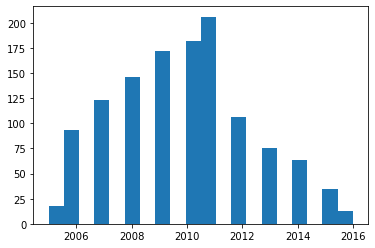

In [24]:
plt.hist(df['year_of_release'][df['platform'] == 'X360'], bins=20)
plt.show();

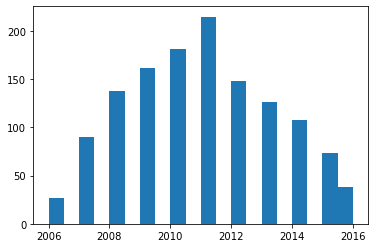

In [25]:
plt.hist(df['year_of_release'][df['platform'] == 'PS3'], bins=20)
plt.show();

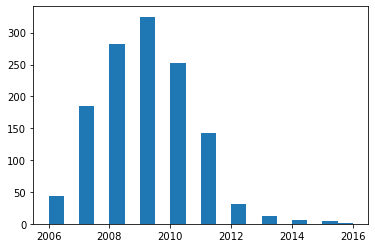

In [26]:
plt.hist(df['year_of_release'][df['platform'] == 'Wii'], bins=20)
plt.show();

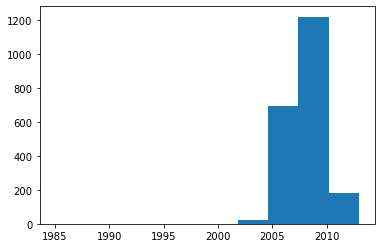

In [27]:
plt.hist(df['year_of_release'][df['platform'] == 'DS'], bins=10)
plt.show();

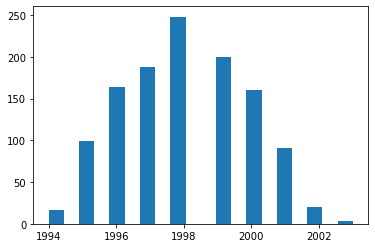

In [28]:
plt.hist(df['year_of_release'][df['platform'] == 'PS'], bins=20)
plt.show();

Похоже, что срок популярности платформ длится около 5 лет.

Опираясь на полученные данные, можно ограничить актуальный период 2011 годом, так как с 2011 у лидеров наблюдается падение объемов продаж.

In [29]:
df_actual = df[df['year_of_release']>=2011]

In [30]:
display(df_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False))

Изучим динамику продаж у топовых платформ с 2011 года:

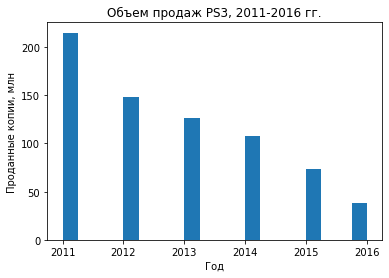

In [31]:
plt.hist(df_actual['year_of_release'][df_actual['platform'] == 'PS3'], bins=20)
plt.ylabel('Проданные копии, млн')
plt.xlabel('Год')
plt.title("Объем продаж PS3, 2011-2016 гг.")
plt.show();

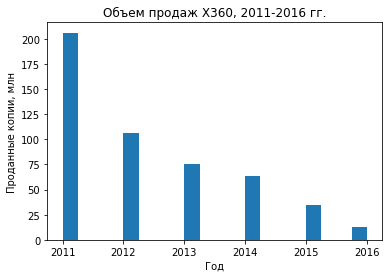

In [32]:
plt.hist(df_actual['year_of_release'][df_actual['platform'] == 'X360'], bins=20)
plt.ylabel('Проданные копии, млн')
plt.xlabel('Год')
plt.title("Объем продаж X360, 2011-2016 гг.")
plt.show();

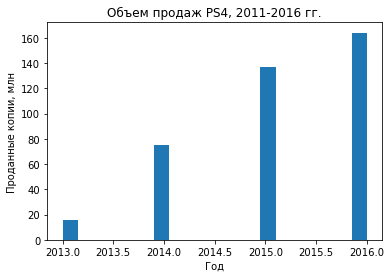

In [33]:
plt.hist(df_actual['year_of_release'][df_actual['platform'] == 'PS4'], bins=20)
plt.ylabel('Проданные копии, млн')
plt.xlabel('Год')
plt.title("Объем продаж PS4, 2011-2016 гг.")
plt.show();

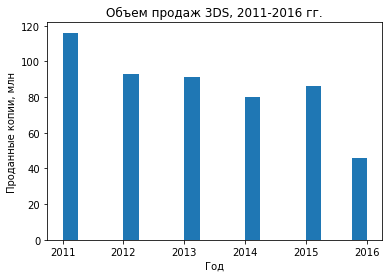

In [34]:
plt.hist(df_actual['year_of_release'][df_actual['platform'] == '3DS'], bins=20)
plt.ylabel('Проданные копии, млн')
plt.xlabel('Год')
plt.title("Объем продаж 3DS, 2011-2016 гг.")
plt.show();

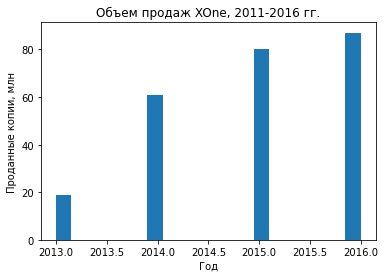

In [35]:
plt.hist(df_actual['year_of_release'][df_actual['platform'] == 'XOne'], bins=20)
plt.ylabel('Проданные копии, млн')
plt.xlabel('Год')
plt.title("Объем продаж XOne, 2011-2016 гг.")
plt.show();

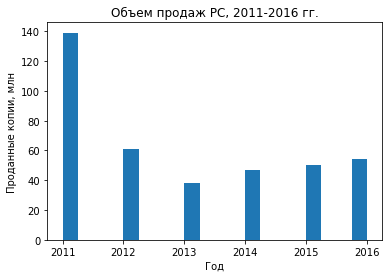

In [36]:
plt.hist(df_actual['year_of_release'][df_actual['platform'] == 'PC'], bins=20)
plt.ylabel('Проданные копии, млн')
plt.xlabel('Год')
plt.title("Объем продаж PC, 2011-2016 гг.")
plt.show();

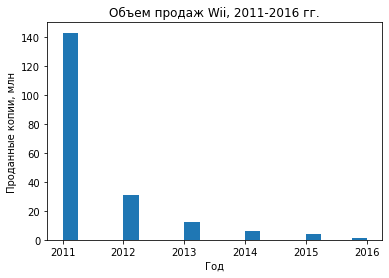

In [37]:
plt.hist(df_actual['year_of_release'][df_actual['platform'] == 'Wii'], bins=20)
plt.ylabel('Проданные копии, млн')
plt.xlabel('Год')
plt.title("Объем продаж Wii, 2011-2016 гг.")
plt.show();

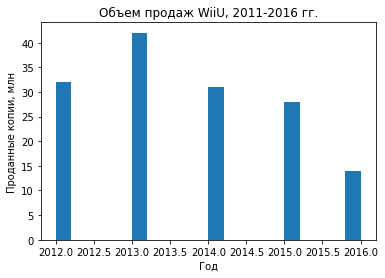

In [38]:
plt.hist(df_actual['year_of_release'][df_actual['platform'] == 'WiiU'], bins=20)
plt.ylabel('Проданные копии, млн')
plt.xlabel('Год')
plt.title("Объем продаж WiiU, 2011-2016 гг.")
plt.show();

По итогам последних 5 лет наиболее перспективными выглядят платформы PS4 и XOne. Объемы продаж игр на PC заметно упала после 2011, однако показывают небольшой, но устойчивый рост с 2014 года. PS3 и X360, а также Wii на 2016 г. являются однозначно устаревшими и потерявшими популярность платформами. 

Изучим глобальные продажи игр в разбивке по платформам, используя график «ящик с усами»:

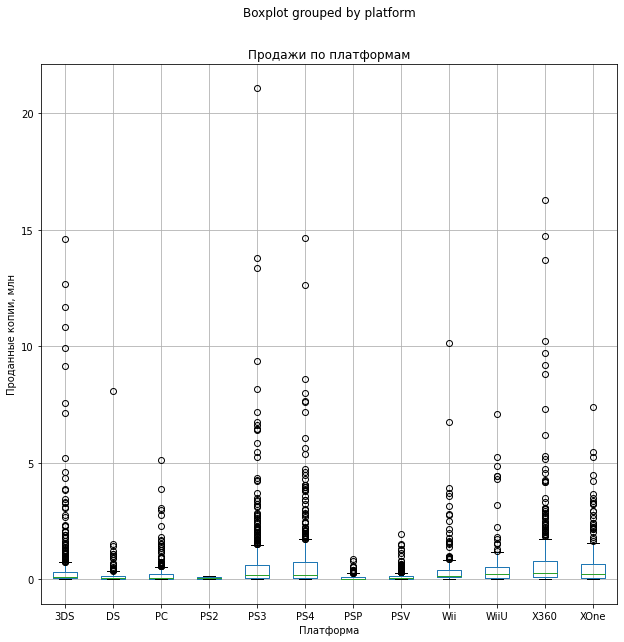

In [39]:
bplot = df_actual.boxplot(by = 'platform',column = 'total_sales',figsize=(10,10))
bplot.set_ylabel('Проданные копии, млн')
bplot.set_xlabel('Платформа')
bplot.set_title('Продажи по платформам')
plt.show();

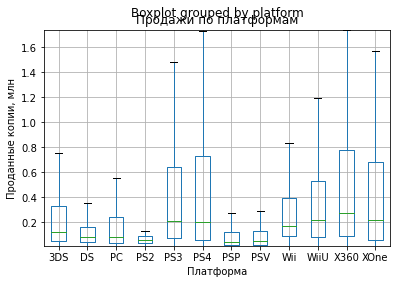

In [40]:
fig, ax = plt.subplots()
box = df_actual.boxplot(by = 'platform',column = 'total_sales', ax=ax, sym='') 
ax.margins(y=0)
plt.xlabel("Платформа")
plt.ylabel("Проданные копии, млн")
plt.title("Продажи по платформам")
plt.show()

У лидеров продаж наблюдаются наиболее существенные выбросы. Возможно, именно наличие большого количества суперуспешных игр позволило данным платформам выйти в лидеры. По 75% квантилю в топ-3 входят PS4, X360 и XOne.

Изучим влияние на продажи платформы PS4 отзывов пользователей и критиков. Сначала построим диаграмму рассеяния и рассчитаем корреляцию для отзывов критиков:

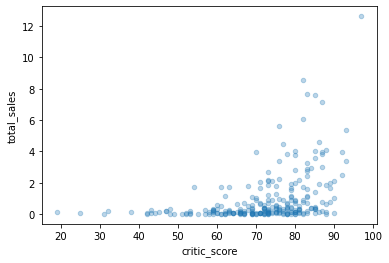

In [41]:
df_PS4 = df_actual[df_actual['platform']=='PS4']
df_PS4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
plt.show();


In [42]:
data_1 = df_PS4[['total_sales','critic_score']]
data_1.corr()

Можно сделать вывод о том, что корреляция между оценками критиками и продажами отдельных игр довольно слабо выражена и заметна лишь после определенного уровня (около 70 пунктов). Это означает, что игры с очень высоким рейтингом действительно являются хитами продаж.

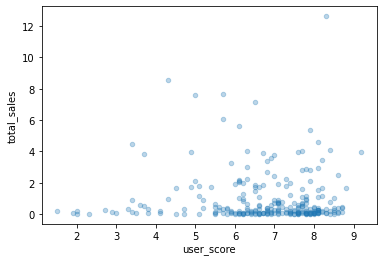

In [43]:
df_PS4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
plt.show();

In [44]:
data_2 = df_PS4[['total_sales','user_score']]
data_2.corr()

В случае с оценками пользователей, корреляция практически отсутствует.

Аналогичным образом изучим влияние на продажи платформы XOne отзывов пользователей и критиков:

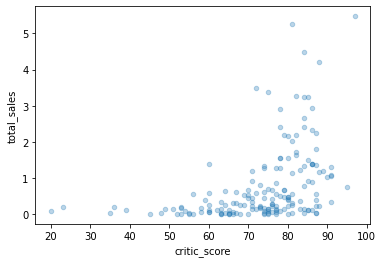

In [45]:
df_XOne = df_actual[df_actual['platform']=='XOne']
df_XOne.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
plt.show();


In [46]:
data_3 = df_XOne[['total_sales','critic_score']]
data_3.corr()

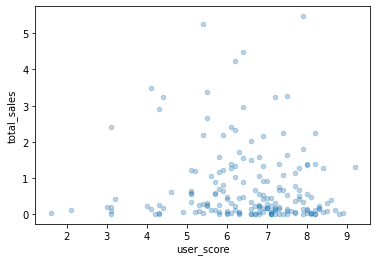

In [47]:
df_XOne.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
plt.show();

In [48]:
data_4 = df_XOne[['total_sales','user_score']]
data_4.corr()

Похоже, результаты не сильно отличаются от PS4.

Для сравнения возьмем PC как платформу, отличающуюся по динамике:

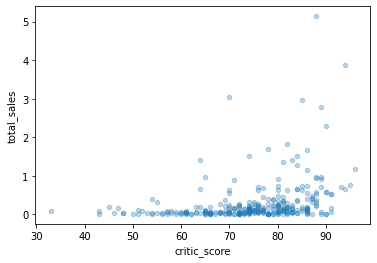

In [49]:
df_PC = df_actual[df_actual['platform']=='PC']
df_PC.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3)
plt.show();

In [50]:
data_5 = df_PC[['total_sales','critic_score']]
data_5.corr()

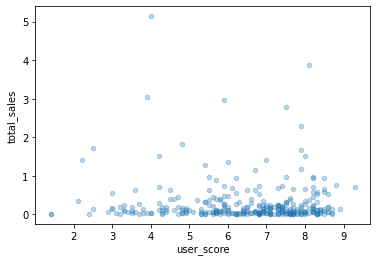

In [51]:
df_PC.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3)
plt.show();

In [52]:
data_6 = df_PC[['total_sales','user_score']]
data_6.corr()

У PC результаты аналогичны двум другим платформам.

Наконец, сравним распределение прибыли по жанрам:

In [53]:
display(df_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False))

In [54]:
display(df_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False))

In [55]:
display(df_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False))

По суммарным продажам безоговорочными лидерами являются жанры action и shooter. Однако, если посмотреть на средние или медианные продажи, в топе окажутся shooter, sports и platform. Это может быть связано с простотой освоения игры, наличием онлайн-режима у многих игр данных жанров и, возможно, желанием "выпустить пар" у многих игроков. Последние места заняли приключения и головоломки, что может свидетельствовать о том, что они сложны в освоении или просто скучны. 

## Составление портрета пользователя каждого региона.

Изучим различия среднего пользователя из Северной Америки, Европы и Японии. Сначала посмотрим, как выглядит распределение выручки по различным платформам:

In [81]:
df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)


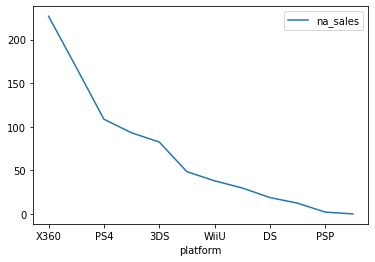

In [82]:
df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(legend=True)

In [57]:
display(df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False))

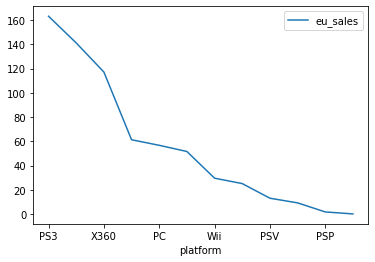

In [84]:
df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(legend=True)

In [58]:
display(df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False))

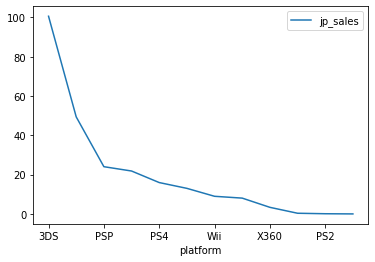

In [85]:
df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(legend=True)

У всех трех регионов лидеры сильно отличаются. В Северной Америке пальму первенства держит X360.  В Европе 1 и 2 место принадлежит платформе PlayStation. В Японии с большим отрывом лидирует 3DS, являющаяся продуктом японской компании Nintendo.

Теперь рассмотрим наиболее популярные жанры в разрезе по регионам:

In [59]:
display(df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False))

In [60]:
display(df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False))

In [61]:
display(df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False))

Распределение популярных жанров в Европе и Североной Америке практически полностью совпадают. В первую тройку попали жанры action, shooter и sports. В Японии распределение оказалось совсем иным, среди топовых жанров совпадение лишь по action. Похоже, что результаты отражают культурные различия данных регионов. 

Наконец, проанализируем, повлиял ли рейтинг ESRB на продажи в отдельных регионах:

In [62]:
display(df_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False))

In [63]:
display(df_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False))

In [64]:
display(df_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False))

Распределение рейтингов в странах Европы и Северной Америки также практически совпадает. При этом на первом месте M, что подтверждает популярность игр, содержащих насилие и ненормативную лексику. В Японии большинство игр не имеют рейтинга, а M стоит лишь на 4 месте. Возможно, игры популярные в Японии просто не получают рейтинг от ESRB.

## Проверка гипотез.

Сначала проверим гипотезу о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковы. Необходимо сравнить средние двух генеральных совокупностей между собой. Пусть нулевая гипотеза (H0) гласит, что средние рейтинги двух платформ действительно совпадают. Тогда альтернативная гипотеза (H1) говорит о том, что они различны.

In [65]:
sample_XOne = list(df_actual[df_actual['platform'] == 'XOne']['user_score'])

In [66]:
sample_PC = list(df_actual[df_actual['platform'] == 'PC']['user_score'])

Пусть критический уровень статистической значимости будет равен 5%.

In [67]:
alpha = .05

In [68]:
results = st.ttest_ind(
    sample_XOne, 
    sample_PC)

In [69]:
print('p-значение: ', results.pvalue)

In [70]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно равна 35%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами двух платформ.

Теперь проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Пусть нулевая гипотеза (H0) гласит, что средние рейтинги жанров Action и Sports одинаковы. Тогда альтернативная гипотеза (H1) говорит о том, что они различны.

In [71]:
sample_action = list(df_actual[df_actual['genre'] == 'Action']['user_score'])

In [72]:
sample_sports = list(df_actual[df_actual['genre'] == 'Sports']['user_score'])

Пусть критический уровень статистической значимости также будет равен 5%.

In [73]:
alpha = .05

In [74]:
results_1 = st.ttest_ind(
    sample_action, 
    sample_sports)

In [75]:
print('p-значение: ', results_1.pvalue)

In [76]:
if results_1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

При полученном p-значении можно утверждать, что средние рейтинги жанров Action и Sports действительно различаются.

# Общий вывод

Мы проанализировали исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы с целью выявления закономерностей, определяющих успешность игры. В ходе анализа было исследовано количество игр, выпущенных в различные годы и рассмотрена динамика продаж, в том числе, с использованием гистограмм. Далее был проведен анализ влияния отзывов пользователей и критиков на продажи внутри популярных платформ. Было также проанализировано распределение продаж игр по жанрам. Затем был составлен портрет пользователя каждого региона. Наконец, были проверены гипотезы о различиях средних рейтингов пользователей по платформам и жанрам. Проведенный анализ позволяет сделать следующие выводы:

1) Срок популярности платформ длится около 5 лет. По итогам последних 5 лет наиболее перспективными выглядят платформы PS4 и XOne. Объемы продаж игр на PC заметно упала после 2011, однако показывают небольшой, но устойчивый рост с 2014 года. PS3 и X360, а также Wii на 2016 г. являются однозначно устаревшими и потерявшими популярность платформами. Возможно, именно наличие большого количества суперуспешных игр позволило топовым платформам выйти в лидеры.

2) Корреляция между оценками критиками и продажами отдельных игр довольно слабо выражена и заметна лишь после определенного уровня (около 70 пунктов рейтинга). Это означает, что игры с очень высоким рейтингом действительно являются хитами продаж.

3) По суммарным продажам безоговорочными лидерами являются жанры action и shooter. Однако, если посмотреть на средние или медианные продажи, в топе окажутся shooter, sports и platform. Это может быть связано с простотой освоения игры, наличием онлайн-режима у многих игр данных жанров и, возможно, желанием "выпустить пар" у многих игроков. Последние места заняли приключения и головоломки, что может свидетельствовать о том, что они сложны в освоении или просто скучны. 

4) У всех трех регионов платформы-лидеры сильно отличаются. В Северной Америке пальму первенства держит X360. В Европе 1 и 2 место принадлежит платформе PlayStation. В Японии с большим отрывом лидирует 3DS, являющаяся продуктом японской компании Nintendo. 

5) Распределение популярных жанров в Европе и Североной Америке практически полностью совпадают. В первую тройку попали жанры action, shooter и sports. В Японии распределение оказалось совсем иным, среди топовых жанров совпадение лишь по action. Похоже, что результаты отражают культурные различия данных регионов.
 
6) Распределение рейтингов в странах Европы и Северной Америки также практически совпадает. При этом на первом месте M, что подтверждает популярность игр, содержащих насилие и ненормативную лексику. В Японии большинство игр не имеют рейтинга, а M стоит лишь на 4 месте. Возможно, игры, популярные в Японии, просто не получают рейтинг от ESRB.

7) Средние пользовательские рейтинги платформ Xbox One и PC одинаковы, а средние пользовательские рейтинги жанров Action и Sports действительно различаются.

